### imports

In [3]:
import numpy as np
from MNISTDataLoader import load
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.random.seed(1)

### loading the data

In [4]:
training_data, test_data = load("MNIST_dataset")

### creating & training the network

In [31]:
import DenseNeuralNetwork as dnn
mlp = dnn.DenseNeuralNetwork([784, 32, 16, 10])
cost_acc_data = mlp.train_plot(training_data=training_data, epochs=40, batch_size=32, learning_rate=0.5, test_data=test_data, gd="mini-batch",interval=1)

Epoch 0: 6056/10000 MSE: 0.0581438569091813
Epoch 1: 7804/10000 MSE: 0.034888048720526796
Epoch 2: 8326/10000 MSE: 0.026985408768706344
Epoch 3: 8548/10000 MSE: 0.022903993407935773
Epoch 4: 8685/10000 MSE: 0.020380934061585778
Epoch 5: 8807/10000 MSE: 0.018678694850452014
Epoch 6: 8871/10000 MSE: 0.017455971999934327
Epoch 7: 8922/10000 MSE: 0.01680593839692337
Epoch 8: 8981/10000 MSE: 0.01575752790501148
Epoch 9: 8994/10000 MSE: 0.015270442002681345
Epoch 10: 9037/10000 MSE: 0.01466534507569896
Epoch 11: 9075/10000 MSE: 0.014105057192270551
Epoch 12: 9109/10000 MSE: 0.01367998785096609
Epoch 13: 9137/10000 MSE: 0.013310575329776794
Epoch 14: 9157/10000 MSE: 0.012996033051120149
Epoch 15: 9175/10000 MSE: 0.012905395583818974
Epoch 16: 9205/10000 MSE: 0.012516731711304182
Epoch 17: 9212/10000 MSE: 0.012319631120219991
Epoch 18: 9219/10000 MSE: 0.012118453415418484
Epoch 19: 9249/10000 MSE: 0.011882538449153858
Epoch 20: 9245/10000 MSE: 0.011860776724298989
Epoch 21: 9268/10000 MSE: 0.0

In [6]:
print("1")
mlp1 = dnn.DenseNeuralNetwork([784, 32, 16, 10])
lr1 = mlp.train_plot2(training_data=training_data,interval=1,learning_rate=0.01,epochs=45,test_data=test_data)
print("2")
mlp2 = dnn.DenseNeuralNetwork([784, 32, 16, 10])
lr2 = mlp.train_plot2(training_data=training_data,interval=1,learning_rate=0.1,epochs=45,test_data=test_data)
print("3")
mlp3 = dnn.DenseNeuralNetwork([784, 32, 16, 10])
lr3 = mlp.train_plot2(training_data=training_data,interval=1,learning_rate=1,epochs=45,test_data=test_data)
print("4")
mlp4 = dnn.DenseNeuralNetwork([784, 32, 16, 10])
lr4 = mlp.train_plot2(training_data=training_data,interval=1,learning_rate=10,epochs=45,test_data=test_data)

1
Epoch 0: 9369/10000 MSE: 0.009922277616132073
Epoch 1: 9373/10000 MSE: 0.009913755409305574
Epoch 2: 9373/10000 MSE: 0.009911248007631268
Epoch 3: 9376/10000 MSE: 0.009908184115625905
Epoch 4: 9375/10000 MSE: 0.009906262307086165
Epoch 5: 9376/10000 MSE: 0.009904867160832779
Epoch 6: 9375/10000 MSE: 0.009904412939942504
Epoch 7: 9378/10000 MSE: 0.00990328358179941
Epoch 8: 9377/10000 MSE: 0.009901843201535537
Epoch 9: 9378/10000 MSE: 0.009900657732694915
Epoch 10: 9379/10000 MSE: 0.009898548415063529
Epoch 11: 9379/10000 MSE: 0.009897350351654862
Epoch 12: 9380/10000 MSE: 0.009896424125662818
Epoch 13: 9379/10000 MSE: 0.009895648788602667
Epoch 14: 9378/10000 MSE: 0.009896920552307004
Epoch 15: 9379/10000 MSE: 0.00989433170484704
Epoch 16: 9378/10000 MSE: 0.009894516968076875
Epoch 17: 9379/10000 MSE: 0.009892775494155211
Epoch 18: 9381/10000 MSE: 0.009892492588312702
Epoch 19: 9380/10000 MSE: 0.009890596469767084
Epoch 20: 9378/10000 MSE: 0.009891328716267068
Epoch 21: 9379/10000 MS

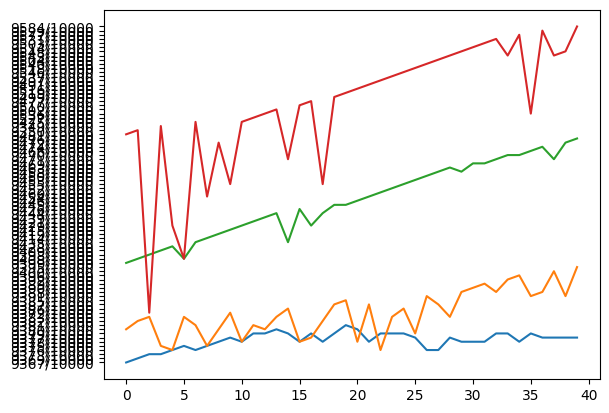

In [12]:
from scipy.signal import savgol_filter   
x = range(40)


fig, ax = plt.subplots()
ax.plot(x,lr1[:40])
ax.plot(x,lr2[:40])
ax.plot(x,lr3[:40])
ax.plot(x,lr4[:40])

plt.show()

[7.88, 60.56, 78.04, 83.26, 85.48, 86.85, 88.07, 88.71, 89.22, 89.81, 89.94, 90.37, 90.75, 91.09, 91.37]
[100.0, 26.145395510523933, 15.688017288109505, 12.134457925160067, 10.299178593471563, 9.164641120151177, 8.399199682405984, 7.849381107823394, 7.557082203875577, 7.0856462100227, 6.866619570907351, 6.594527224111917, 6.342584042309044, 6.151444227398552, 5.985331468691814]


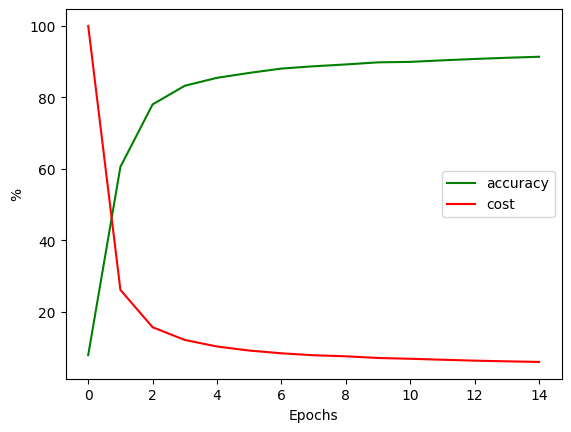

In [51]:
n = 15
fig, ax = plt.subplots()
x = range(len(cost_acc_data[0][:n]))

smooth_cost = []
smooth_accuracy = []

for accuracy_str in cost_acc_data[1][:n]:
    smooth_accuracy.append(int(accuracy_str.split("/")[0])/100)

max_cost = max(cost_acc_data[0][:n])
for cost in cost_acc_data[0][:n]:
    smooth_cost.append(cost/max_cost*100)

print(smooth_accuracy)
print(smooth_cost)

ax.plot(x,smooth_accuracy, label = "accuracy",color="green")
ax.plot(x,smooth_cost, label = "cost",color="red")

ax.set_xlabel("Epochs")
ax.set_ylabel("%")
plt.legend()
plt.savefig("plots/cost_vs_accuracy.png")
plt.show()
